In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load the dataset
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# checking data structure
print(df.info())

# checking for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_l

In [4]:
# checking data statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


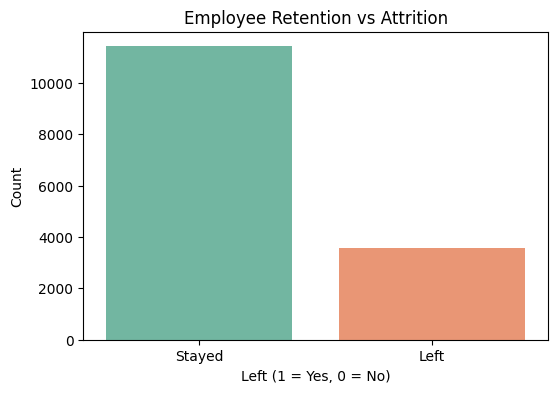

Counts:
 left
0    11428
1     3571
Name: count, dtype: int64

Percentages:
 left
0    76.19
1    23.81
Name: proportion, dtype: float64


In [6]:
# Countplot of target variable
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='left', palette='Set2')
plt.title('Employee Retention vs Attrition')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

# Print exact counts and percentages
counts = df['left'].value_counts()
percentages = df['left'].value_counts(normalize=True) * 100
print("Counts:\n", counts)
print("\nPercentages:\n", percentages.round(2))

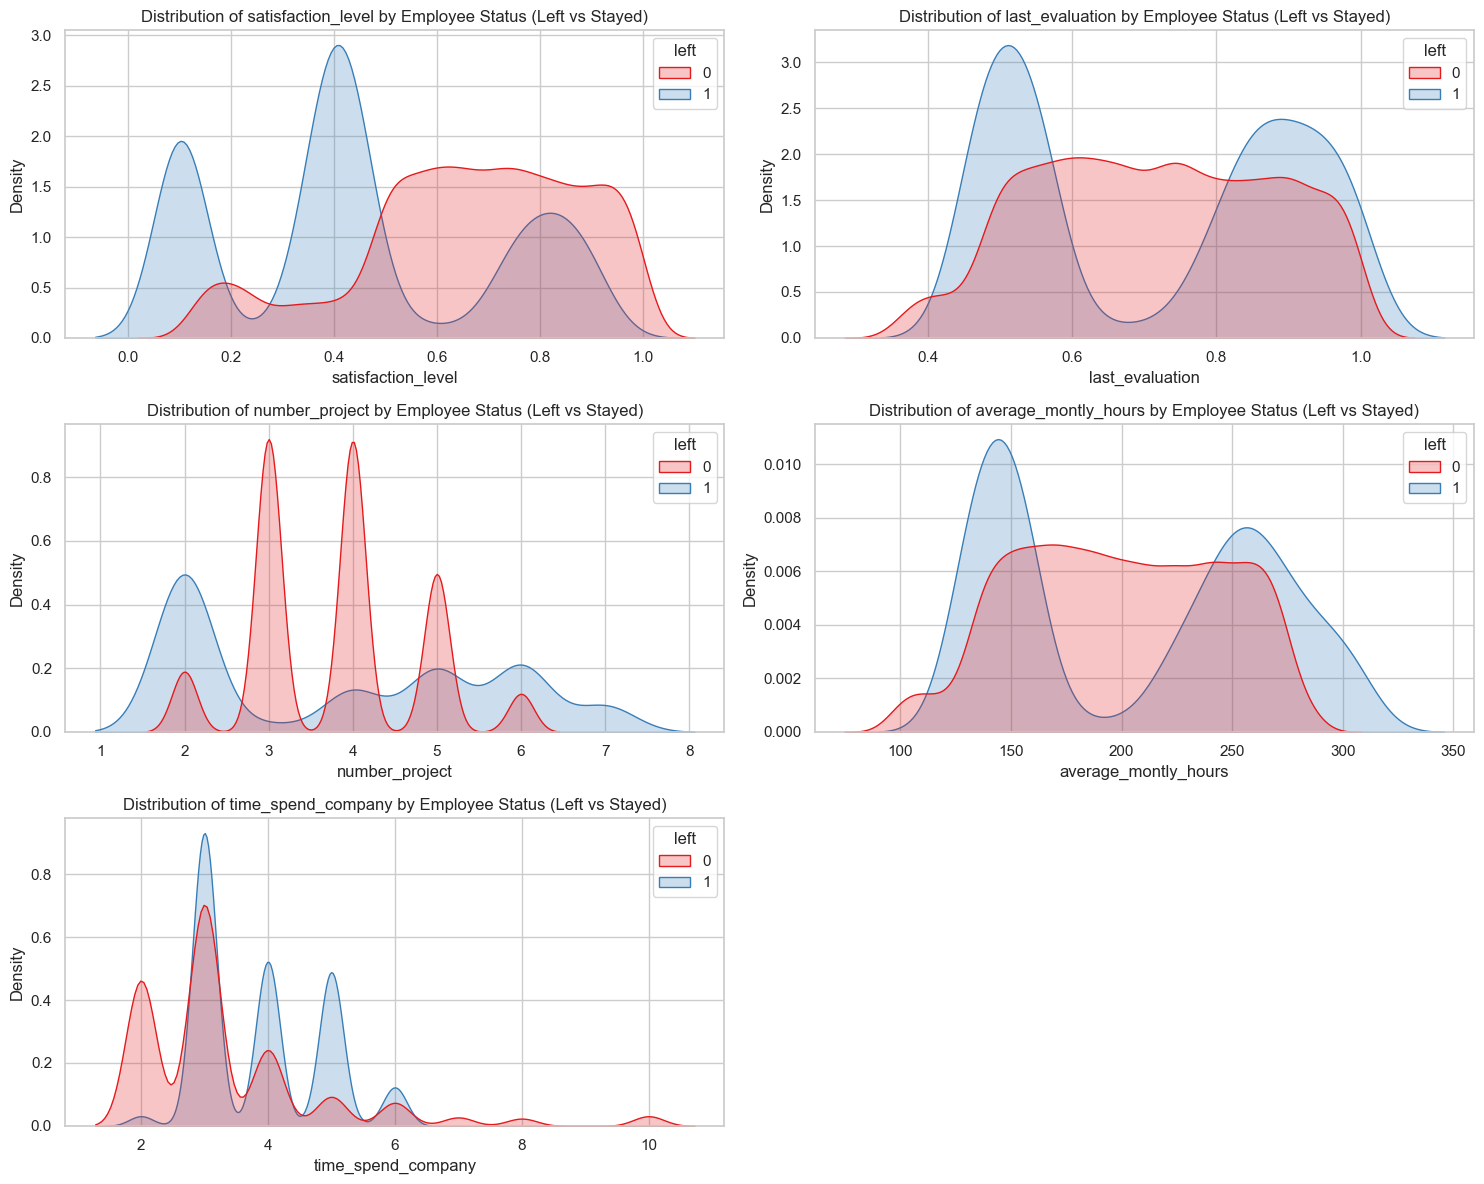

In [7]:
# Set style
sns.set(style="whitegrid")

# List of numerical features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 
                      'average_montly_hours', 'time_spend_company']

# Plot
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df, x=col, hue='left', fill=True, common_norm=False, palette='Set1')
    plt.title(f'Distribution of {col} by Employee Status (Left vs Stayed)')
plt.tight_layout()
plt.show()

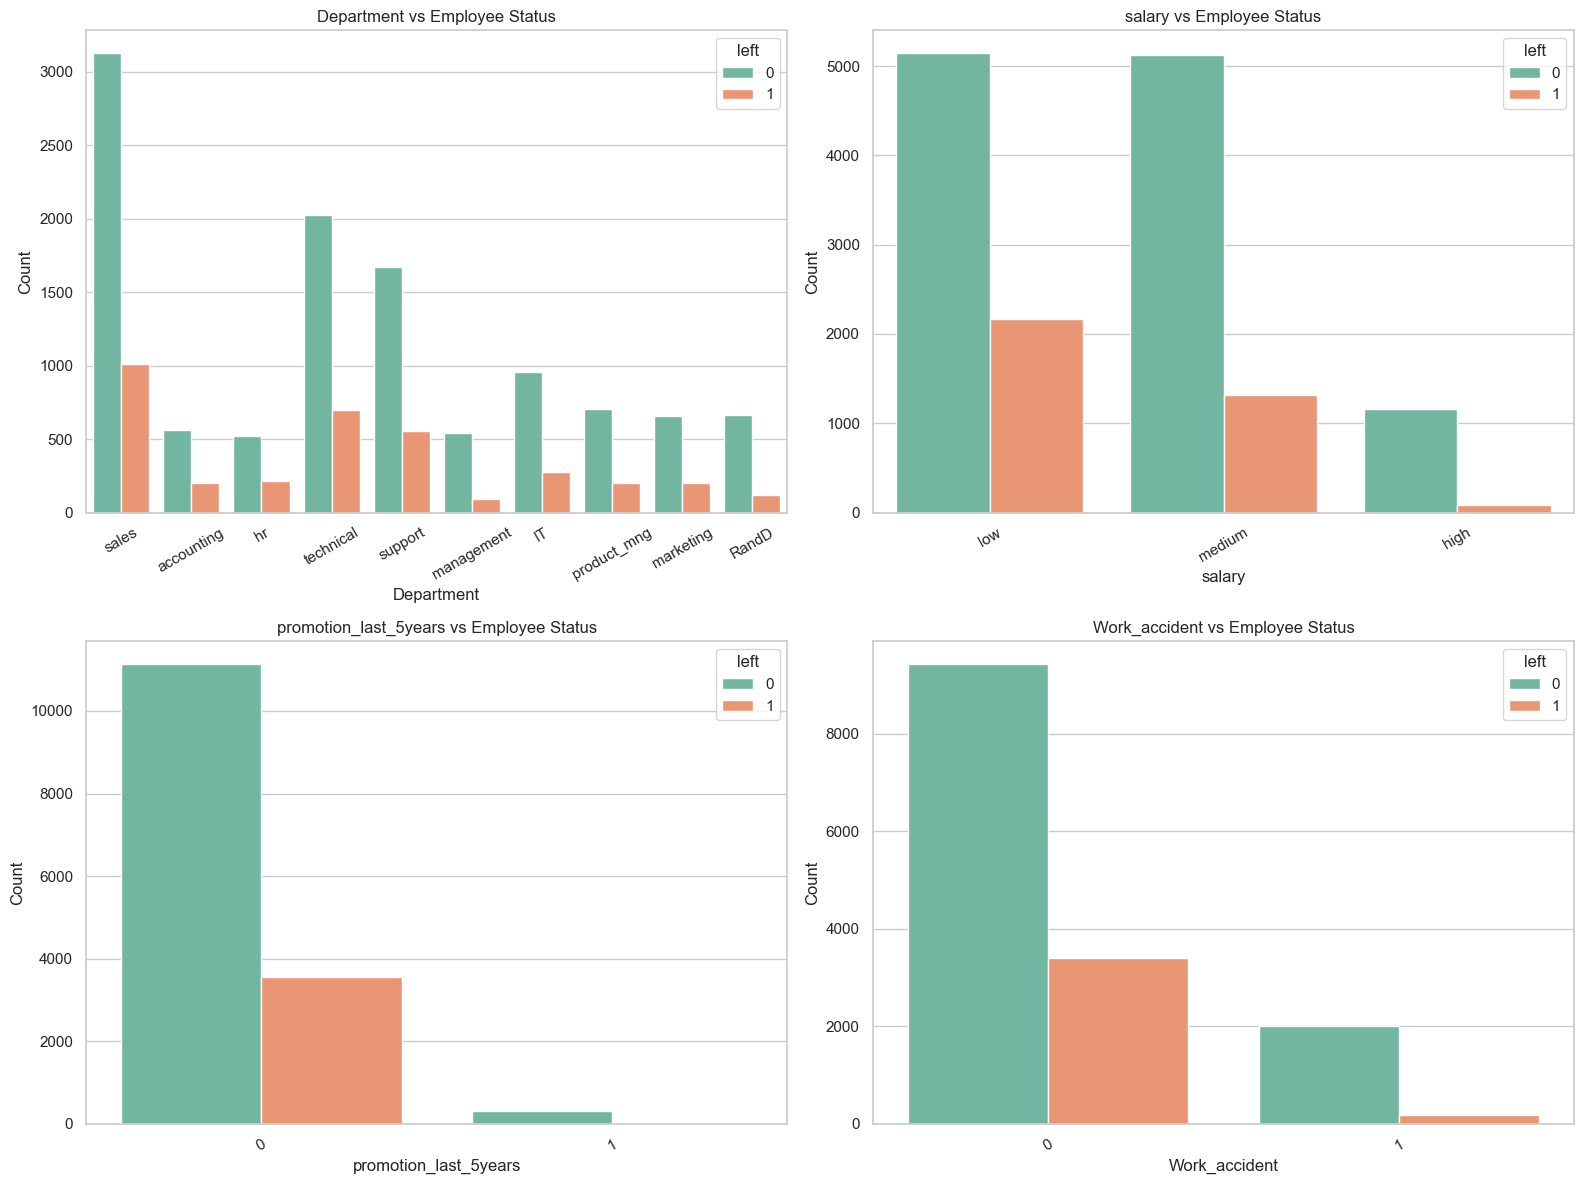

In [8]:
categorical_features = ['Department', 'salary', 'promotion_last_5years', 'Work_accident']

plt.figure(figsize=(16, 12))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='left', palette='Set2')
    plt.title(f'{col} vs Employee Status')
    plt.ylabel('Count')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

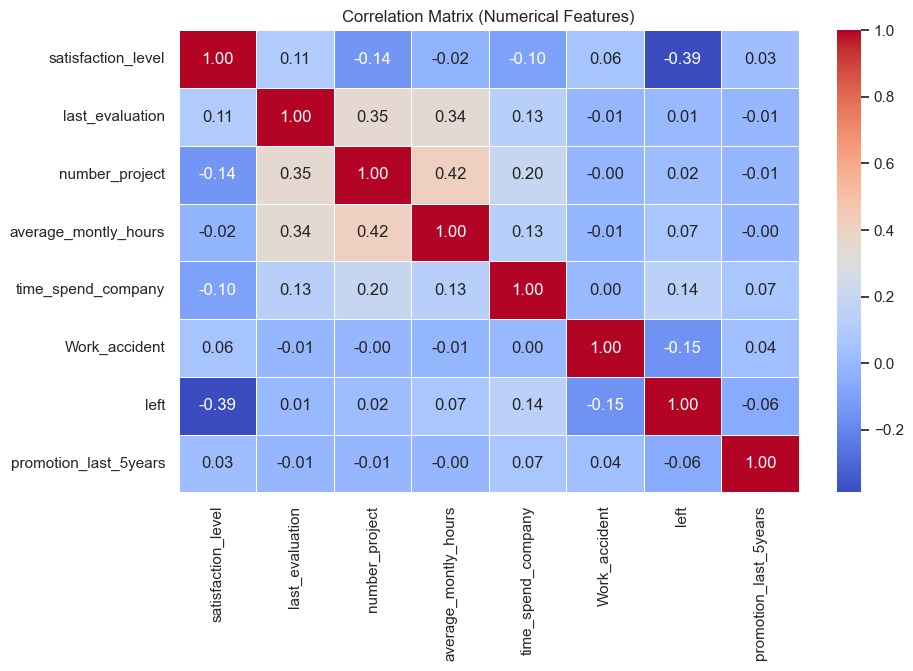

In [9]:
# Compute correlation matrix (only numerical columns)
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# Copy dataframe
df_model = df.copy()

# Step 1: Encode 'salary' as ordinal (low < medium < high)
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_model['salary'] = df_model['salary'].map(salary_mapping)

# Step 2: One-hot encode 'Department'
df_model = pd.get_dummies(df_model, columns=['Department'], drop_first=True)

# Step 3: Define features and target
x = df_model.drop('left', axis=1)
y = df_model['left']

# Step 4: Train-test split (Stratify to maintain class balance)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Show shapes
print("Training Features Shape:", x_train.shape)
print("Test Features Shape:", x_test.shape)


Training Features Shape: (11999, 17)
Test Features Shape: (3000, 17)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(x_train, y_train)

# Predict
lr_y_pred = lr_model.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_y_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_y_pred))


Accuracy: 0.7686666666666667

Confusion Matrix:
 [[1736  550]
 [ 144  570]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83      2286
           1       0.51      0.80      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.82      0.77      0.78      3000



In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(x_train, y_train)

# Predict
y_pred_rf = rf_model.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.991

Confusion Matrix:
 [[2283    3]
 [  24  690]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       1.00      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [13]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                          scale_pos_weight=3.2, # manually balancing class (3571/11428)
                          random_state=42)

# Fit the model
xgb_model.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.9863333333333333

Confusion Matrix:
 [[2267   19]
 [  22  692]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.97      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [16]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Setup CV strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest Cross-Val ROC-AUC
rf_auc_scores = cross_val_score(rf_model, x, y, cv=cv, scoring='roc_auc')
print("Random Forest ROC-AUC (CV):", rf_auc_scores)
print("Random Forest Mean AUC:", round(rf_auc_scores.mean(), 4))

# XGBoost Cross-Val ROC-AUC
xgb_auc_scores = cross_val_score(xgb_model, x, y, cv=cv, scoring='roc_auc')
print("\nXGBoost ROC-AUC (CV):", xgb_auc_scores)
print("XGBoost Mean AUC:", round(xgb_auc_scores.mean(), 4))

Random Forest ROC-AUC (CV): [0.99145721 0.99233215 0.99481744 0.99565159 0.99370208]
Random Forest Mean AUC: 0.9936

XGBoost ROC-AUC (CV): [0.99399673 0.99259529 0.99297576 0.99443023 0.99462087]
XGBoost Mean AUC: 0.9937


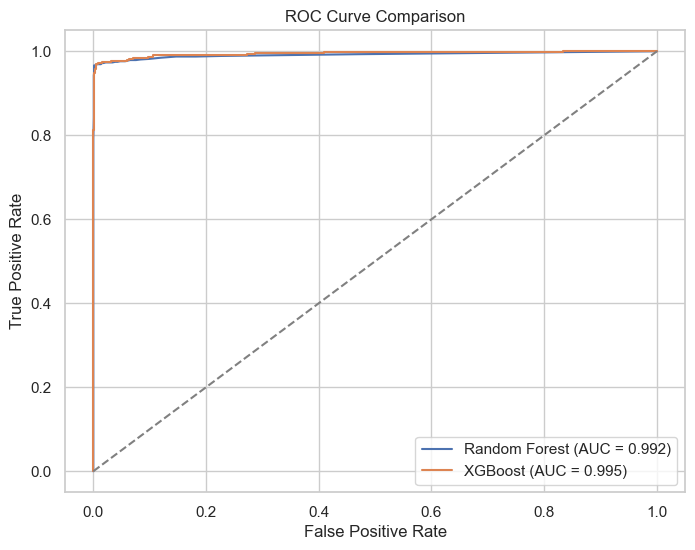

In [17]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for test set
rf_probs = rf_model.predict_proba(x_test)[:, 1]
xgb_probs = xgb_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

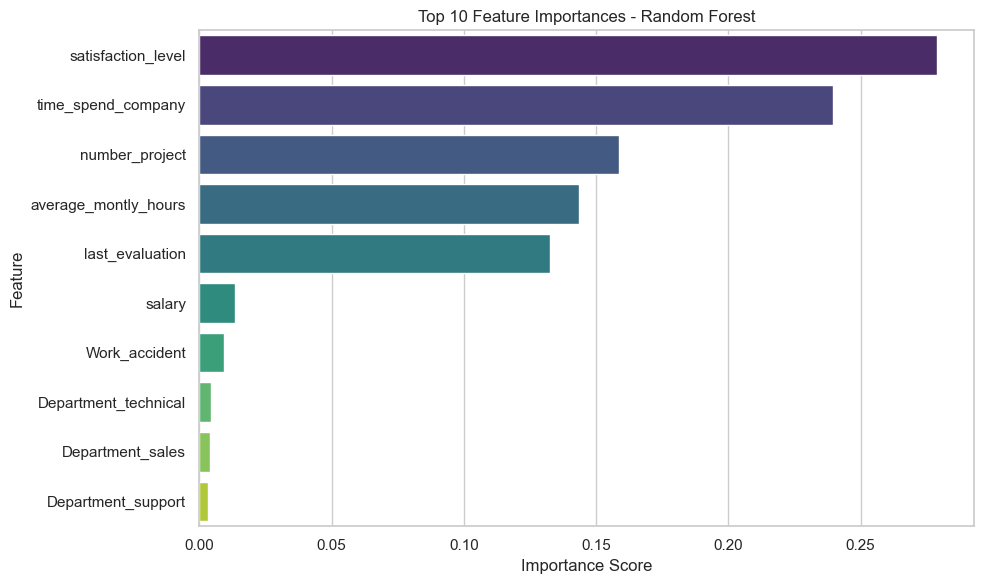

                  Feature  Importance
0      satisfaction_level    0.278940
4      time_spend_company    0.239746
2          number_project    0.158813
3    average_montly_hours    0.143400
1         last_evaluation    0.132757
7                  salary    0.013571
5           Work_accident    0.009443
16   Department_technical    0.004616
14       Department_sales    0.004087
15     Department_support    0.003242
10          Department_hr    0.002166
8        Department_RandD    0.001917
9   Department_accounting    0.001813
11  Department_management    0.001805
6   promotion_last_5years    0.001613


In [18]:
# Create a DataFrame of features and their importance
importances = rf_model.feature_importances_
feature_names = x.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Optionally print full table
print(feat_imp_df.head(15))


In [19]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'employee_retention_model.joblib')

# Optional: Save your feature columns (if using in deployment)
joblib.dump(x.columns.tolist(), 'model_features.joblib')


['model_features.joblib']

In [20]:
# filtering df where left = 0
df_left = df[df['left'] == 0]
df_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
